In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

In [8]:
from misc import mps_overlap
from state_approximation import mps2mpo, mpo2mps, diagonal_expansion, multiple_diagonal_expansions,\
    contract_diagonal_expansion, contract_series_diagonal_expansions, entanglement_entropy
from disentanglers import disentangle_S2, renyi_entropy
from tebd import tebd
from rfunc import pad_mps, pad

In [9]:
tebd_state, _, _ = tebd(10, 1.5, 0.1)
Psi = mps2mpo(tebd_state.copy())
Lambda = Psi.copy()
As, Lambda, info = multiple_diagonal_expansions(Psi,10)
out = contract_series_diagonal_expansions(As, Lambda)

10
10
10
10
10
10


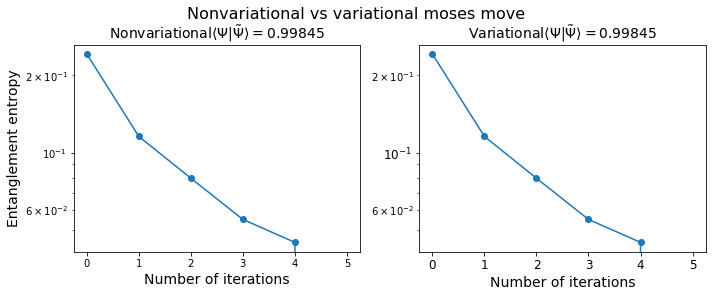

In [12]:
# No halving, no variational
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].semilogy(info_no_variational['Ss'], 'o-')
ax[1].semilogy(info['Ss'], 'o-')
ax[0].set_ylabel("Entanglement entropy", fontsize=14)
ax[0].set_xlabel("Number of iterations", fontsize=14)
ax[1].set_xlabel("Number of iterations", fontsize=14)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax[0].set_title("Nonvariational" + rf"$\langle\Psi|\tilde\Psi\rangle = {round(mps_overlap(out_no_variational, Psi),5)}$", fontsize=14)
ax[1].set_title("Variational" + rf"$\langle\Psi|\tilde\Psi\rangle = {round(mps_overlap(out, Psi),5)}$", fontsize=14)
plt.suptitle("Nonvariational vs variational moses move", y=1.02, fontsize=16)
plt.tight_layout()
#plt.savefig("/space/ge38huj/state_approximation/img/nv_vs_v_mm.png", bbox_inches='tight')
